In [151]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.cort_processor import *
from src.plotter import *
from src.filters import *
import math
import pickle
from sklearn.utils import shuffle
import scipy
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import cm
from scipy import signal
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from matplotlib import colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import tdt 
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample, hilbert, welch
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
from scipy.io import savemat
from scipy.fft import fftshift

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# morbo1101 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/morbo1101')
# neural = morbo1101.tdt_data[0]['neural']
# fs = morbo1101.tdt_data[0]['fs']
# filtered = filter_neural(neural, fs)
# clean_filtered = remove_artifacts(filtered, fs)
# tsn = np.linspace(0, neural.shape[0]/fs,neural.shape[0])
# morbo1101.process()

In [4]:
# seconds = 4
# tn = filtered.shape[0]/fs
# print(tn)

# tr = (morbo1101.data['rates'][0].shape[0]*50)/1000
# print(tr)
# fs_rates = 20
# nperseg_rates = int(seconds*fs_rates)
# nperseg_raw = int(seconds*fs)


In [5]:
# plt.rcParams["figure.figsize"] = (9,20)

In [6]:
# fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20,10))
# f, t, Sxx = signal.spectrogram(filtered[:,0], fs = fs, nperseg = nperseg_raw)
# f2, t2, Sxx2 = signal.spectrogram(morbo1101.data['rates'][0][:,0], fs = fs_rates, nperseg = nperseg_rates)


# ax0.pcolormesh(t, f, Sxx, cmap = 'terrain', shading='gouraud')
# ax0.set_ylabel('Frequency [Hz]')
# ax0.set_xlabel('Time [sec]')
# ax0.set_ylim([0,10])
# ax0.set_xlim([0,250])
# ax0.set_title('filtered neural data')

# ax1.pcolormesh(t2, f2, Sxx2, cmap = 'terrain', shading='gouraud')
# ax1.set_ylim([0,10])
# ax1.set_xlim([0,250])
# ax1.set_ylabel('Frequency [Hz]')
# ax1.set_xlabel('Time [sec]')
# ax1.set_title('spike rates')


In [7]:
# morbo1101.data['rates'][0][:,0].shape

In [8]:
# meepoinj = CortProcessor('/mnt/c/oobootoo/rat-fes/data/meepo-results/injured/meepo')
# neural_mi = meepoinj.tdt_data[0]['neural']
# fs_mi = meepoinj.tdt_data[0]['fs']
# filtered_mi = filter_neural(neural_mi, fs_mi)
# meepoinj.process()

In [9]:
# meepo = CortProcessor('/mnt/c/oobootoo/rat-fes/data/meepo-results/intact/meepo')
# neural_m = meepo.tdt_data[0]['neural']
# fs_m = meepoinj.tdt_data[0]['fs']
# filtered_m = filter_neural(neural_m, fs_m)
# meepo.process()

In [10]:
# seconds = 4
# fs_rates = 20
# nperseg_rates = int(seconds*fs_rates)
# nperseg_raw = int(seconds*fs)

In [11]:
# fig3, (ax0, ax1) = plt.subplots(2, 1, figsize=(20,10), sharex=True)
# f_r, t_r, Sxx_r = signal.spectrogram(meepo.data['rates'][1][:,19], fs = fs_rates, nperseg = nperseg_rates)#, noverlap = nperseg_rates // 3)
# f2_r, t2_r, Sxx2_r = signal.spectrogram(meepoinj.data['rates'][1][:,19], fs = fs_rates, nperseg = nperseg_rates)#, noverlap = nperseg_rates // 3)

# ax0.pcolormesh(t_r, f_r, Sxx_r, cmap = 'terrain', shading='gouraud')
# ax0.set_ylabel('Frequency [Hz]')
# ax0.set_xlabel('Time [sec]')
# ax0.set_ylim([0,10])
# ax0.set_xlim([0,240])
# ax0.set_title('intact')

# ax1.pcolormesh(t2_r, f2_r, Sxx2_r, cmap = 'terrain', shading='gouraud')
# ax1.set_ylim([0,10])
# ax1.set_xlim([0,240])
# ax1.set_ylabel('Frequency [Hz]')
# ax1.set_xlabel('Time [sec]')
# ax1.set_title('injured')
# plt.suptitle("meepo spike rate spectrogram")

In [12]:
# print(fs)

In [13]:
# fig4, (ax0, ax1) = plt.subplots(2, 1, figsize=(20,10))
# f_n, t_n, Sxx_n = signal.spectrogram(filtered_m[:,19], fs = fs, nperseg = nperseg_raw)
# f2_n, t2_n, Sxx2_n = signal.spectrogram(filtered_mi[:,19], fs = fs, nperseg = nperseg_raw)

# ax0.pcolormesh(t_n, f_n, Sxx_n, cmap = 'terrain', shading='gouraud')
# ax0.set_ylabel('Frequency [Hz]')
# ax0.set_xlabel('Time [sec]')
# ax0.set_ylim([0,10])
# ax0.set_xlim([0,150])
# ax0.set_title('intact')

# ax1.pcolormesh(t2_n, f2_n, Sxx2_n, cmap = 'terrain', shading='gouraud')
# ax1.set_ylim([0,10])
# ax1.set_xlim([0,150])
# ax1.set_ylabel('Frequency [Hz]')
# ax1.set_xlabel('Time [sec]')
# ax1.set_title('injured')
# plt.suptitle("meepo neural voltage spectrogram")

In [14]:
# fig4, (ax0, ax1) = plt.subplots(2, 1, figsize=(20,10), sharex=True)

# tsn_m = np.linspace(0, neural_m.shape[0]/fs,neural_m.shape[0])
# tsn_mi = np.linspace(0, neural_mi.shape[0]/fs,neural_mi.shape[0])


# ax0.plot(tsn_mi, filtered_mi[:,0])
# ax0.set_ylabel('Frequency [Hz]')
# ax0.set_xlabel('Time [sec]')
# # ax0.set_ylim([0,10])
# # ax0.set_xlim([0,240])
# ax0.set_title('intact')

# # ax1.pcolormesh(t2_n, f2_n, Sxx2_n, cmap = 'terrain', shading='gouraud')
# # ax1.set_ylim([0,10])
# # ax1.set_xlim([0,240])
# ax1.set_ylabel('Frequency [Hz]')
# ax1.set_xlabel('Time [sec]')
# ax1.set_title('injured')
# plt.suptitle("meepo neural voltage spectrogram")

In [15]:
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/3-meepo919__session.pkl', 'rb') as inp:
#     mep919_session = pickle.load(inp)
# mep919_rates = mep919_session.data['rates']
# mep919_angles = mep919_session.data['angles']
# mep919_coords = mep919_session.data['coords']

In [16]:
# morbo1101 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/morbo1101')
# morbo1101.process()

In [17]:
# morbo1028 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/morbo1028')
# morbo1028.process()

In [18]:
# print(type(morbo1028.data['rates']))
# print(morbo1028.data['rates'].shape)

In [19]:
# _, _, r2_new = morbo1028.decode_phase()


In [20]:
# print(r2_new.shape)

In [21]:
# _, vaf1028, _, _ = morbo1028.decode_angles()

In [22]:
# print('morbo')
# print(np.mean(vaf1028, axis=1))

In [23]:
# print('ratt')
# print(np.mean(vafratt, axis=1))

In [24]:
# rates1004 = np.vstack((meepo1004.data['rates'][0],meepo1004.data['rates'][1],meepo1004.data['rates'][2]))
# rates1010 = np.vstack((meepo1010.data['rates'][0],meepo1010.data['rates'][1],meepo1010.data['rates'][2],meepo1010.data['rates'][3]))
# rates1017 = np.vstack((meepo1017.data['rates'][0],meepo1017.data['rates'][1]))
# rates0923 = np.vstack((meepo0923.data['rates'][0],meepo0923.data['rates'][1]))

In [25]:
# def spectro1(self, window=4, plotting = False):
#     rate_append =[]
#     for i in len(self.data['rates']):
#         rate_append.append(self.data['rates'][i])
#     rates = np.vstack(rate_append)
#     seconds = window
#     fsr = 20
#     tlim = (rates.shape[0]*50)/1000
#     nperseg_rates = int(seconds*fsr)
#     Sxx_list = []
#     for i in range(0,32):
#         f, t, Sxx = signal.spectrogram(rates[:,i], fs = fsr, nperseg = nperseg_rates)
#         Sxx_list.append(Sxx)
#     Sxx_sum = np.sum(Sxx_list, axis=0)
#     if plotting == True:
#         fig, (ax2) = plt.subplots(1, 1, figsize=(10,6))
#         ax2.pcolormesh(t, f, Sxx_sum, cmap = 'terrain', shading='gouraud')
#         ax2.set_ylim([0,10])
#         # ax2.set_xlim([0,tlim])
#         ax2.set_ylabel('Frequency [Hz]')
#         ax2.set_xlabel('Time [sec]')
#         ax2.set_title('spike rate spectrogram')
#     return Sxx_sum

In [26]:
# Sxx_1023 = morbo1028.spectro1(plotting=True)
# Sxx_1023deprc = morbo1028deprc.spectro1(plotting=True)

# Sxx_1101 = morbo1101.spectro1(plotting=True)

In [27]:
# Sxx_1004 = spectro1(rates1004, window=4, plotting=True)
# Sxx_1010 = spectro1(rates1010, window=4, plotting=True)
# Sxx_1017 = spectro1(rates1017, window=4, plotting=True)
# Sxx_0923 = spectro1(rates0923, window=4, plotting=True)

In [28]:
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/rat-t_session.pkl', 'rb') as inp:
    # ratt_session = pickle.load(inp)
# ratt_rates = ratt_session.data['rates']
# ratt_angles = ratt_session.data['angles']
# ratt_coords = ratt_session.data['coords']

In [29]:
# _, vafratt, _, _ = ratt_session.decode_angles()

In [30]:
# print(ratt_angles[0].shape)

In [2]:
meepo1004 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/meepo-injured-files/1004')
meepo1004.process()

read from t=0s to t=246.43s
read from t=0s to t=298.5s
read from t=0s to t=307.79s


(array([[20., 40., 40., ..., 40., 20., 60.],
        [60., 40., 60., ..., 20., 20., 20.],
        [20.,  0.,  0., ..., 40., 20., 40.],
        ...,
        [20., 20.,  0., ...,  0., 40., 60.],
        [ 0., 20.,  0., ..., 40., 20., 20.],
        [ 0.,  0.,  0., ...,  0., 20.,  0.]]),
 array([[ 96.83447267,  30.16114856,  32.36723442, ...,  67.29106944,
          75.28234185, 110.13758237],
        [112.59527659,  55.01824894,  49.48172506, ...,  75.61167036,
          74.86562375, 115.42236622],
        [106.81237871,  49.07522976,  41.48453291, ...,  73.9578064 ,
          71.42929072, 115.51059779],
        ...,
        [ 42.53015631,  50.69772762, 112.09944035, ...,  99.71449285,
          79.48877642, 130.97313903],
        [ 42.36824141,  53.19870646, 116.89102993, ..., 104.34025744,
          79.42266324, 135.59599398],
        [ 42.93830777,  70.32944178, 131.76046615, ...,  99.55277141,
          79.81004473, 133.63321002]]))

In [3]:
meepo1010 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/meepo-injured-files/1010')
meepo1010.process()

read from t=0s to t=334.57s
read from t=0s to t=212.6s
read from t=0s to t=210.65s
read from t=0s to t=191.82s


(array([[100.,  80.,  80., ...,  60.,  80.,  20.],
        [160.,  60., 120., ...,  40.,  80.,  60.],
        [ 80.,  40.,  40., ...,  20.,  20.,  60.],
        ...,
        [ 60.,  40.,  40., ...,  20.,   0.,  60.],
        [ 80.,  80.,  40., ...,  40.,  40.,  60.],
        [ 20.,  20.,  40., ...,   0., 100.,   0.]]),
 array([[143.0400436 ,  54.0921713 , 104.95395216, ...,  93.80215493,
          82.74474859, 128.10745575],
        [148.70896817,  68.7751947 , 126.888956  , ..., 102.58270101,
          87.69990038, 143.63667527],
        [149.1923775 ,  63.02866892, 120.79020691, ...,  85.70969186,
          88.71986213, 124.97106907],
        ...,
        [ 95.81947169,  86.1716278 , 108.93070882, ...,  57.40052289,
          96.55728965,  97.87518553],
        [109.83075873,  79.50716988, 104.95041505, ...,  60.49975602,
          92.38215368, 104.10108752],
        [ 99.20815723,  65.39235735,  88.41289005, ...,  64.46647048,
          94.29945136, 111.39845037]]))

In [4]:
meepo1017 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/meepo-injured-files/1017')
meepo1017.process()

read from t=0s to t=321.67s
read from t=0s to t=281.53s


(array([[ 80., 120., 100., ..., 160.,  80., 160.],
        [120., 140., 200., ...,  40., 160., 100.],
        [100., 140., 120., ..., 120., 160.,  60.],
        ...,
        [ 80.,  40.,  40., ...,  40.,  40.,  40.],
        [  0.,  40.,   0., ...,  60.,   0.,  20.],
        [ 40.,  20.,   0., ...,   0.,  20.,  40.]]),
 array([[ 84.17319067,  65.2387375 ,  96.48832118, ...,  75.7519265 ,
          90.80943151, 112.66108965],
        [ 52.85042945,  59.92806824,  83.63139316, ...,  69.85455937,
          94.83480285, 105.51248037],
        [ 52.98854847,  48.79016052,  93.66896665, ...,  80.81767948,
          96.02729771, 113.4562626 ],
        ...,
        [151.18670394,  24.01795194,  68.99315151, ...,  71.85321653,
          85.73958221, 104.91133416],
        [149.7403835 ,  25.40836566,  72.07328083, ...,  79.74252802,
          83.50928705, 109.17411282],
        [151.0969294 ,  22.8548863 ,  72.43886474, ...,  81.29783847,
          82.89813219, 107.49508423]]))

In [5]:
meepo0923 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/meepo-injured-files/control-intact-923')
meepo0923.process()

read from t=0s to t=332.12s
read from t=0s to t=323.65s


(array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,  20.,   0., ...,  20.,  20.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [ 40.,  80.,  80., ...,  40.,  80.,  20.],
        [ 20., 100.,  20., ...,  40.,  60.,  20.],
        [  0.,  80.,  20., ...,  60., 140.,  20.]]),
 array([[ 38.29582169,  58.41496512,  90.56500631, ...,  94.38486094,
          77.8180818 , 123.39847814],
        [ 25.78291026,  45.06900024,  85.98348513, ...,  93.26505758,
          88.31527571, 122.49840454],
        [ 29.20849446,  43.43933917,  88.9360202 , ...,  92.13224368,
          82.87385049, 133.43513483],
        ...,
        [ 41.31546757,  44.65358762,  82.80052769, ...,  60.83293864,
          81.75379425, 100.81242085],
        [ 47.6744851 ,  39.88101671,  85.74444867, ...,  65.10559843,
          74.64518019, 103.58403218],
        [ 57.60359322,  41.10275838,  92.43482237, ...,  69.93302927,
          66.82392577, 105.43090996]]))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
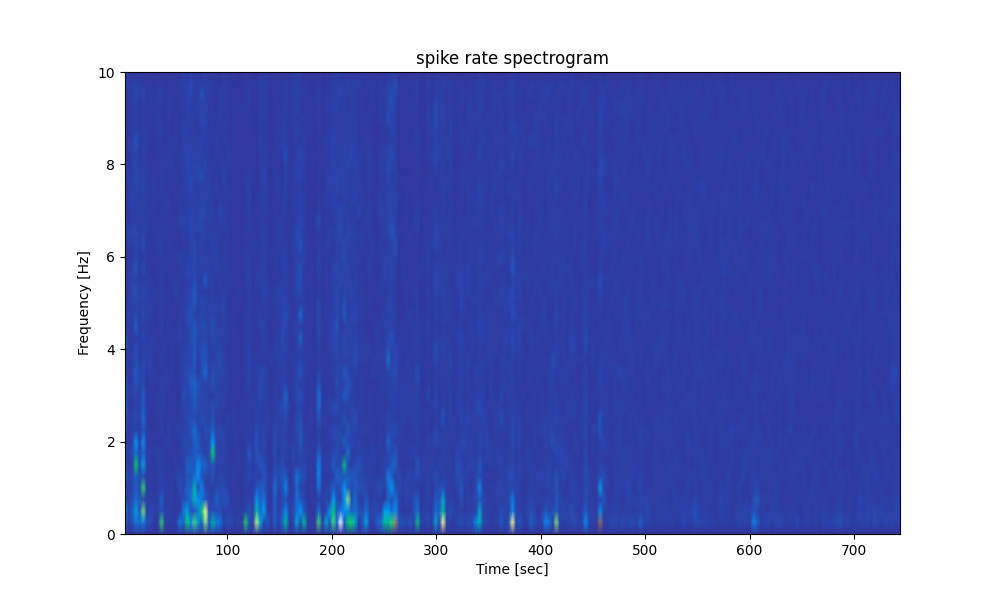

In [114]:
Sxx_1004, t_1004, f_1004 = meepo1004.spectro1(plotting=True)
# Sxx_1010, t_1010, f_1010 = meepo1010.spectro1(plotting=True)
# Sxx_1017, t_1017, f_1017 = meepo1017.spectro1(plotting=True)
# Sxx_0923, t_0923, f_0923 = meepo0923.spectro1(plotting=True)

In [132]:
def arctan_fn(predicted_sin, predicted_cos):   
    arctans = []
    for i in range(predicted_sin.shape[1]):
        arctan = np.arctan2(predicted_sin[:,i],predicted_cos[:,i])
        arctan_angles = np.degrees(arctan) + 180
        arctans.append(arctan_angles)
    arctans = np.array(arctans).T
    return arctans

def sine_and_cosine(phase_list):
    phase_list = np.radians(phase_list - 180)
    sin_array = []
    cos_array = []
    for i in range(phase_list.shape[1]):
        sin = np.sin(phase_list[:,i])
        cos = np.cos(phase_list[:,i])
        sin_array.append(sin)
        cos_array.append(cos)
    sin_array = np.array(sin_array).T
    cos_array = np.array(cos_array).T
    return sin_array, cos_array
    
def predicted_lines(actual, H):
    holding_array = []
    for ii in range(H.shape[1]):
        temp1 = test_wiener_filter(actual, H[:,ii])
        holding_array.append(temp1)
    holding_array = np.array(holding_array).T
    return holding_array

def test_wiener_filter(x, H):
    """
    To get predictions from input data x with linear decoder
    x: input data
    H: parameter vector obtained by training
    """
    x_plus_bias = np.c_[np.ones((np.size(x, 0), 1)), x]
    y_pred = np.dot(x_plus_bias, H)
    return y_pred    
      

In [133]:
rate_stack =[]
for i in range(len(meepo1004.data['rates'])):
    rate_stack.append(meepo1004.data['rates'][i][10:])
rates = np.vstack(rate_stack)

angle_stack =[]
for i in range(len(meepo1004.data['angles'])):
    angle_stack.append(meepo1004.data['angles'][i][10:])
angles = np.vstack(angle_stack)

tsf = np.linspace(0, (rates.shape[0]*50)/1000,rates.shape[0])

#replace the following with a more analytical extraction of the gait_frequency vairable (via PSD of kin):
# gait_frequency = 1.5
# gait_upper = gait_frequency + 0.5*gait_frequency
# gait_lower = gait_frequency - 0.5*gait_frequency
gait_upper = 2.75
gait_lower = 1.5


indexes = np.where(np.logical_and(f_1004 >= gait_lower, f_1004 <= gait_upper))[0]
print(indexes)
Sxx_stack = np.sum(Sxx_1004[indexes[0]:indexes[-1]+1,:], axis = 0)

Sxx_stack_volatile = Sxx_stack.copy()
time_volatile = t_1004.copy()
upsampled_Sxx_stack = []
for i in range(tsf.shape[0]):
    if time_volatile.shape[0] > 1:
        while tsf[i] >= time_volatile[0]:
            time_volatile = time_volatile[1:]
            Sxx_stack_volatile = Sxx_stack_volatile[1:]
    upsampled_Sxx_stack.append(Sxx_stack_volatile[0])
upsampled_Sxx_stack = np.array(upsampled_Sxx_stack)

[ 6  7  8  9 10 11]


In [135]:
arctans, phase_list_test, phase_list_full, h_sin, h_cos  = meepo1004.decode_phase(metric_angle = 'forelimb')
tst = np.linspace(0, (phase_list.shape[0]*50)/1000,phase_list.shape[0])

In [136]:
arctans.shape
print(phase_list.shape)

(2990, 7)


In [155]:
stitch_rates, stitch_angles = meepo1004.stitch_and_format()
angle_names = np.array(meepo1004.data["angle_names"])
na = np.where(angle_names == 'forelimb')[0][0]
forelimb_phase = phase_list_full[:,na]
phase_inits = np.where(forelimb_phase == 0)[0]
upsampled_zero_hold = np.zeros(forelimb_phase.shape[0])
random_zero_hold = np.zeros(forelimb_phase.shape[0])
downsampled_zero_hold = np.zeros(phase_inits.shape[0])
mean_power = 1.2*np.mean(upsampled_Sxx_stack)
for i in range(phase_inits.shape[0]):
    if phase_inits[i] != phase_inits[-1]:
        gait_power = np.mean(upsampled_Sxx_stack[phase_inits[i]:phase_inits[i+1]])
        if gait_power >= mean_power:
            upsampled_zero_hold[phase_inits[i]:phase_inits[i+1]] = 1
            downsampled_zero_hold[i] = 1
    else:
        gait_power = np.mean(upsampled_Sxx_stack[phase_inits[i]:])
        if gait_power >= mean_power:
            upsampled_zero_hold[phase_inits[i]:] = 1
            downsampled_zero_hold[i] = 1
shuffled_gait_selections = shuffle(downsampled_zero_hold)
for i in range(phase_inits.shape[0]):
    if phase_inits[i] != phase_inits[-1]:
        if shuffled_gait_selections[i] == 1:
            random_zero_hold[phase_inits[i]:phase_inits[i+1]] = 1
    else:
        if shuffled_gait_selections[i] == 1:
            random_zero_hold[phase_inits[i]:phase_inits[i+1]] = 1

random_rates = []
random_angles = []
for i in range(random_zero_hold.shape[0]):
    if random_zero_hold[i] == 1:
        random_rates.append(stitch_rates[i])
        random_angles.append(stitch_angles[i])
random_rates = np.array(random_rates)
random_angles = np.array(random_angles)
        
        
rebuilt_rates = []
rebuilt_angles = []
for i in range(upsampled_zero_hold.shape[0]):
    if upsampled_zero_hold[i] == 1:
        rebuilt_rates.append(stitch_rates[i])
        rebuilt_angles.append(stitch_angles[i])
rebuilt_rates = np.array(rebuilt_rates)
rebuilt_angles = np.array(rebuilt_angles)
rebuilt_rates_copy = np.copy(rebuilt_rates)
rebuilt_angles_copy = np.copy(rebuilt_angles)




print(shuffled_gait_selections.shape)
print(phase_inits.shape)

(855,)
(855,)


In [158]:
re_arctans, re_phase_list, _, re_h_sin, re_h_cos = meepo1004.decode_phase(rebuilt_rates, rebuilt_angles, metric_angle = 'forelimb')
tsre = np.linspace(0, (re_phase_list.shape[0]*50)/1000,re_phase_list.shape[0])

In [159]:
rand_arctans, rand_phase_list, _, rand_h_sin, rand_h_cos = meepo1004.decode_phase(random_rates, random_angles, metric_angle = 'forelimb')
tsrand = np.linspace(0, (rand_phase_list.shape[0]*50)/1000,rand_phase_list.shape[0])

Text(0, 0.5, 'spectral thresholding')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
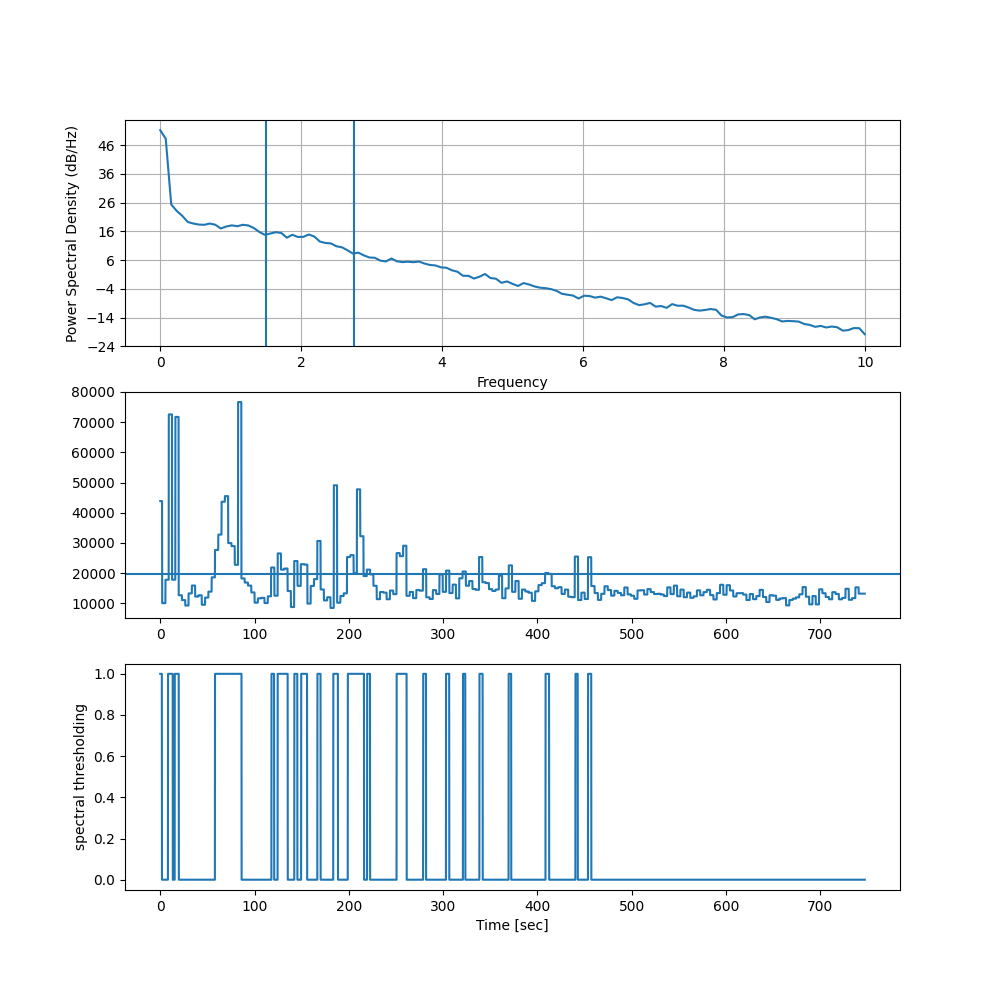

In [141]:
fig4, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(10,10))

ax0.psd(x= stitch_angles[:,6], Fs = 20)
ax0.axvline(x=gait_lower)
ax0.axvline(x=gait_upper)


ax1.plot(tsf, upsampled_Sxx_stack)
ax1.axhline(y=mean_power)

ax2.plot(tsf, upsampled_zero_hold)
ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('spectral thresholding')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
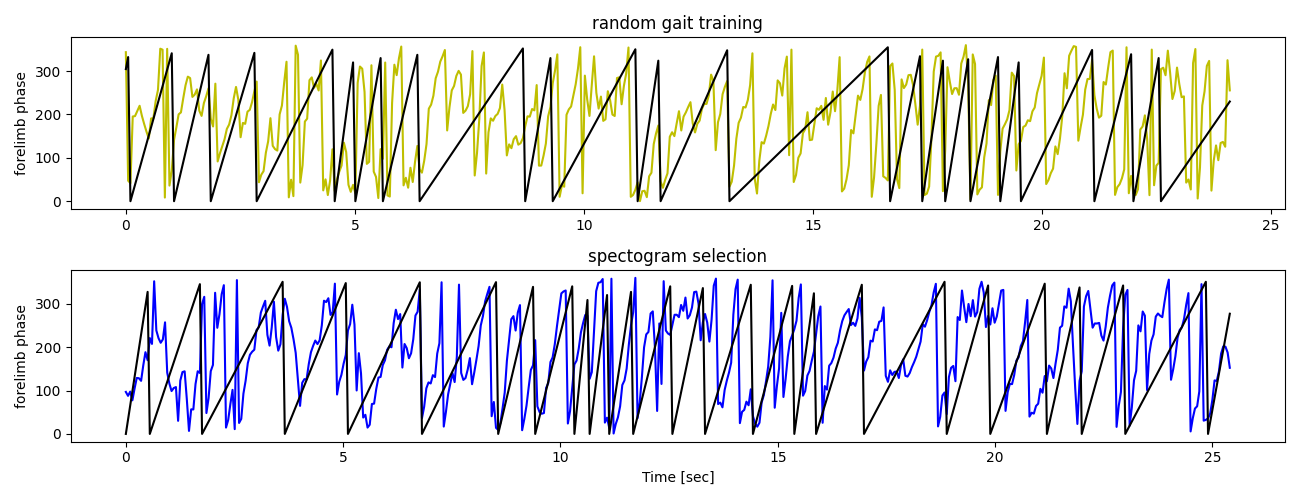

In [170]:
fig4, (ax0, ax1) = plt.subplots(2, 1, figsize=(13,5),sharex = False)

ax0.plot(tsrand, rand_arctans[:,6], c = 'y')
ax0.plot(tsrand, rand_phase_list[:,6], c='k')
ax0.set_ylabel('forelimb phase')
ax0.set_title('random gait training')

ax1.plot(tsre, re_arctans[:,6], c = 'b')
ax1.plot(tsre, re_phase_list[:,6], c='k')
ax1.set_ylabel('forelimb phase')
ax1.set_title('spectogram selection')

# ax2.plot(tsf, upsampled_zero_hold)
ax1.set_xlabel('Time [sec]')
# ax2.set_ylabel('spectral thresholding')
fig4.tight_layout()

In [ ]:
fig4, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(10,10),sharex = True)

ax0.plot(tsre, un_arctans[:,3], c = 'y')
ax0.plot(tsre, re_phase_list[:,3], c='k')
ax0.set_ylabel('limbfoot phase')
ax0.set_title('full domain training')

ax1.plot(tsre, re_arctans[:,3], c = 'b')
ax1.plot(tsre, re_phase_list[:,3], c='k')
ax1.set_ylabel('limbfoot phase')
ax1.set_title('spectogram selection')

# ax2.plot(tsf, upsampled_zero_hold)
ax1.set_xlabel('Time [sec]')
# ax2.set_ylabel('spectral thresholding')
# ax2.plot(tsf, stitch_angles[:,3])
ax2.plot(tsre, rebuilt_angles_copy[:,3])